# Time Series Modeling for Real Estate Investments: A Consultant's Guide to Identifying the Best Zip Codes using Zillow Research Data

## Overview

##### What do we mean by Real Estate?
Real estate refers to land, buildings, and other physical property, including natural resources such as crops, minerals, or water, that can be bought, sold, leased, or rented for various purposes. Real estate is a significant part of the global economy and is used for residential, commercial, industrial, and agricultural purposes. Real estate investments can provide both short-term and long-term returns through rental income, property appreciation, and value-added investments such as renovations and developments.


>With a population of over 330 million, The real estate industry in the USA is a significant contributor to the country's economy, accounting for approximately 6% of the Gross Domestic Product (GDP). This industry comprises of various sub-sectors, including residential and commercial real estate, real estate development, property management, and real estate investment trusts (REITs).

>Residential real estate is the largest sub-sector, accounting for the majority of real estate transactions in the country. The demand for residential real estate is driven by factors such as population growth, household formations, and employment opportunities. The commercial real estate sector, which includes office buildings, retail spaces, and industrial properties, also plays a significant role in the economy, with businesses relying on these properties to operate and grow.


### a. Specifying the Data Analytic Question
#### Problem statement
Real estate represents a significant portion of most people's wealth, and this is especially true for many homeowners in the United States. A number of factors drive the real estate market including government policies, demographics of the potential buyers,affordability, disparity in housing access, location, cash flows and liquidity as well as the current economic climate. The many variables can make the process tedious for the buyers. Naruto consultants hopes to create a predictive time series model that  can help to determine the top five zipcodes in which to invest in.

#### Main Objectives
 * To develop a time series model that would predict the top five zipcodes to invest in
 

#### Specific Objectives
 * To act as a consultant for Naruto investment firm and provide a solid recommendation for the top 5 best zip codes for investment
 * To find change in house returns over time

### b. Metric of Success
* The model will be considered a success if it achieves a low RMSE and the ROI is adequate 

### c. Recording the Experimental Design

1. Importing Libraries
2. Loading the Dataset
3. Tidying the data
4. External data source validation
5. Performing Exploratory Data Analysis
6. Model Development and Model performance evaluation
7. Use model to forecast the prices
8. Conclusions and Future Improvement Ideas


### d. Data Understanding

This Dataset was obtained from [Zillow website](https://github.com/learn-co-curriculum/dsc-phase-4-choosing-a-dataset/blob/main/time-series/zillow_data.csv) and comprises of **14723 rows and 272 columns** in Wide Format. 

|Dataset columns|Column Description|Data type|
|:---|:---|---|
|RegionID|Represents a unique ID for each region.|integer (int64)|
|RegionName|Represents the name of the region/ also the zipcode|integer (int64)|
|City|Represents the city where the region is located.|	string (object)|
|State|	Represents the state where the region is located.|	string (object)|
|Metro|	Represents the metropolitan area where the region is located (if applicable).|	string (object)|
|CountyName|Represents the name of the county where the region is located.|string (object)|
|SizeRank|Represents the relative size of the region compared to other regions in the dataset.|	integer (int64)|
|1996 upto 2018|Represents the median home price for the region in months and years	|float (float64)|



## 1. Importing the Libraries

In [27]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
sns.set()

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from matplotlib.pylab import rcParams


## 2.Loading The Data

In [2]:
# displaying all columns
pd.set_option("display.max_columns",None)

In [3]:
# load the data from the csv file
df = pd.read_csv('zillow_data.csv')
# display the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [4]:
#display the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,1732

Creating an Return On Investment column so that the top five zipcodes can be identified

In [5]:
# creating a column of %ROI
df["%ROI"] = ((df["2018-04"] / df["2012-01"]) ** (1 / (2018-2012)) - 1) * 100

In [6]:
# creating a column of actual ROI
df['ROI price'] = df["2018-04"] - df["2012-01"]-1

In [7]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,%ROI,ROI price
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.

In [8]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,%ROI,ROI price
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.390900e+04,1.390900e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.411000e+04,1.411000e+04,1.411000e

## 3. Tidying the Dataset

In [9]:
# Reviewing the shape of the dataframe
df.shape

(14723, 274)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 274 entries, RegionID to ROI price
dtypes: float64(221), int64(49), object(4)
memory usage: 30.8+ MB


Since the dataset has many columns, the first 10 columns have been picked to be displayed

In [11]:
# checking the top 10 columns and their datatypes
df.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    14723 non-null  int64  
 1   RegionName  14723 non-null  int64  
 2   City        14723 non-null  object 
 3   State       14723 non-null  object 
 4   Metro       13680 non-null  object 
 5   CountyName  14723 non-null  object 
 6   SizeRank    14723 non-null  int64  
 7   1996-04     13684 non-null  float64
 8   1996-05     13684 non-null  float64
 9   1996-06     13684 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.1+ MB


#### Since it is impossible for the exploration to be done as is originally, a pd.melt function has been applied to a form where it is easily readable and can be used for modelling and exploration.
The dataset will be transformed from a wide formart to a long format

In [12]:
# convert wide format to long format
data = pd.melt(df, 
               id_vars=['RegionID','RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','%ROI','ROI price'], 
               var_name='Date')

# rename RegionID to zipcode
data = data.rename(columns={'RegionName': 'Zipcode','value':'Price'})

#convert zipcode to categorical datatype
data['Zipcode'] = data['Zipcode'].astype('str')

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m')

data.head()

,RegionID,Zipcode,SizeRank,City,State,Metro,CountyName,%ROI,ROI price,Date,Price
0,84654,60657,1,Chicago,IL,Chicago,Cook,5.730851,292899.0,1996-04-01,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,8.285652,122199.0,1996-04-01,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,4.828700,81299.0,1996-04-01,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,5.856559,378099.0,1996-04-01,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,1.305960,9099.0,1996-04-01,77300.0


In [13]:
data.shape

(3901595, 11)

The dataset has now changed to 3901595 rows and 11 columns

In [14]:
#Checking for duplicates within the dataset
print(f'The number of duplicates within the dataset is : {data.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [15]:
# Checking for missing values
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
%ROI          1.521429
ROI price     1.521429
Date          0.000000
Price         4.021202
dtype: float64

The metro column will be filled with missing, the rest of the columns which have missing columns will be left as is and will be handled in the preprocessing stage

In [16]:
# filling missing values 
data['Metro'].fillna('Missing',inplace = True)

In [17]:
# Recheck for missing values in Metro column
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         0.000000
CountyName    0.000000
%ROI          1.521429
ROI price     1.521429
Date          0.000000
Price         4.021202
dtype: float64

In [18]:
# statistical description of numerical variables
data.describe()

,RegionID,SizeRank,%ROI,ROI price,Price
count,3.901595e+06,3.901595e+06,3.842235e+06,3.842235e+06,3.744704e+06
mean,8.107501e+04,7.362000e+03,5.468191e+00,8.927807e+04,2.076064e+05
std,3.193304e+04,4.250165e+03,3.654485e+00,1.630284e+05,2.400207e+05
min,5.819600e+04,1.000000e+00,-8.800055e+00,-6.940100e+04,1.130000e+04
25%,6.717400e+04,3.681000e+03,2.854330e+00,2.279900e+04,9.790000e+04
50%,7.800700e+04,7.362000e+03,4.678817e+00,4.739900e+04,1.476000e+05
75%,9.092100e+04,1.104300e+04,7.509623e+00,9.899900e+04,2.372000e+05
max,7.538440e+05,1.472300e+04,2.282181e+01,5.827699e+06,1.931490e+07


In [19]:
#statistical description of categorical variables
data.describe(include=['object'])

,Zipcode,City,State,Metro,CountyName
count,3901595,3901595,3901595,3901595,3901595
unique,14723,7554,51,702,1212
top,60657,New York,CA,Missing,Los Angeles
freq,265,30210,324360,276395,69960


## 4. External Dataset Validation


Home prices in Washington accelerated quickly from 2002 through 2007,
increasing by over $121,000, a gain of 64%.

In 2008, the housing market bubble burst when subprime mortgages, a huge consumer debt load, and crashing home values converged. Homeowners began defaulting on the home loans.

Median prices continued to trend upwards in the subsequent years, increasing with more than 20%.


The full article can be found in the link below

[Washington center for Real Estate Research](https://wcrer.be.uw.edu/archived-reports/)

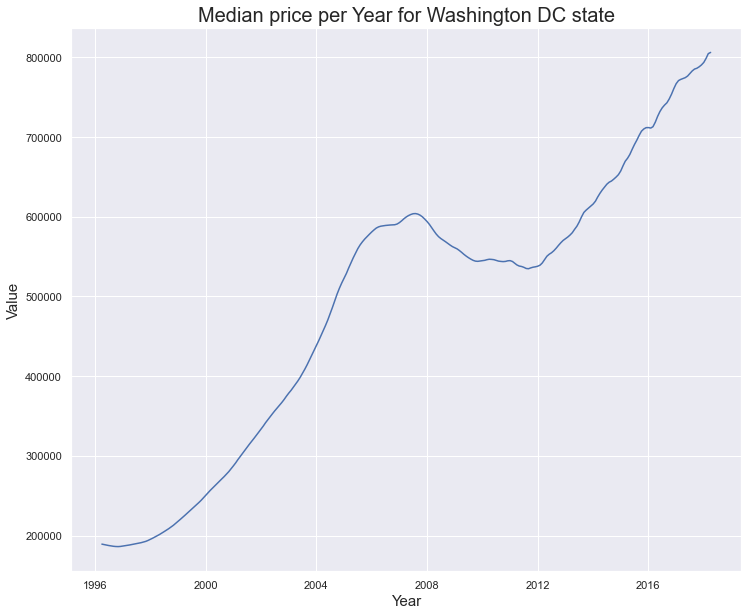

In [28]:
# Washington DC state
state_data = data[data['State'] == 'DC']
yearly_data = state_data.groupby('Date').agg({'Price': 'mean'})

# Plotting the median prices of washington DC over the years
plt.figure(figsize=(12,10))
plt.plot(yearly_data.index, yearly_data['Price'])

plt.title('Median price per Year for Washington DC state',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.show()

## 5. **Exploratory Data Analysis**
### 5.1 **Univariate Analysis**

# County

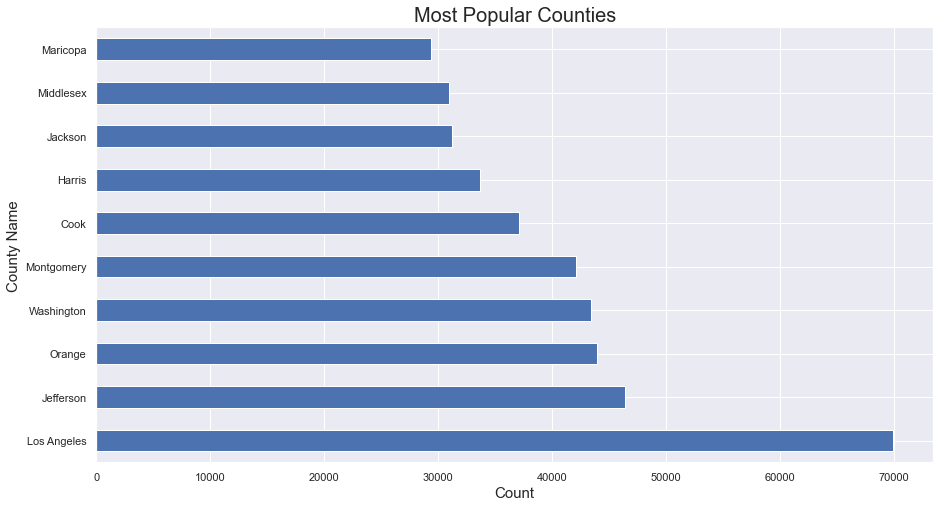

In [30]:
plt.figure(figsize=(15,8))
data.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Most Popular Counties",fontsize=20);

Los Angeles is the most popular County in the dataset.

# States

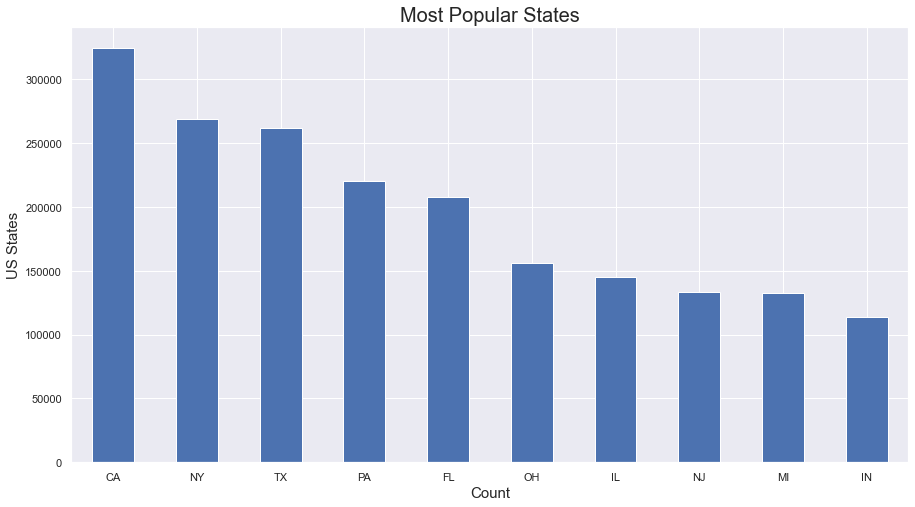

In [31]:
plt.figure(figsize=(15,8))
data.State.value_counts()[:10].plot(kind="bar")
plt.xlabel("Count",fontsize=15)
plt.ylabel("US States",fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular States",fontsize=20);

California is the most popular state.

# Cities

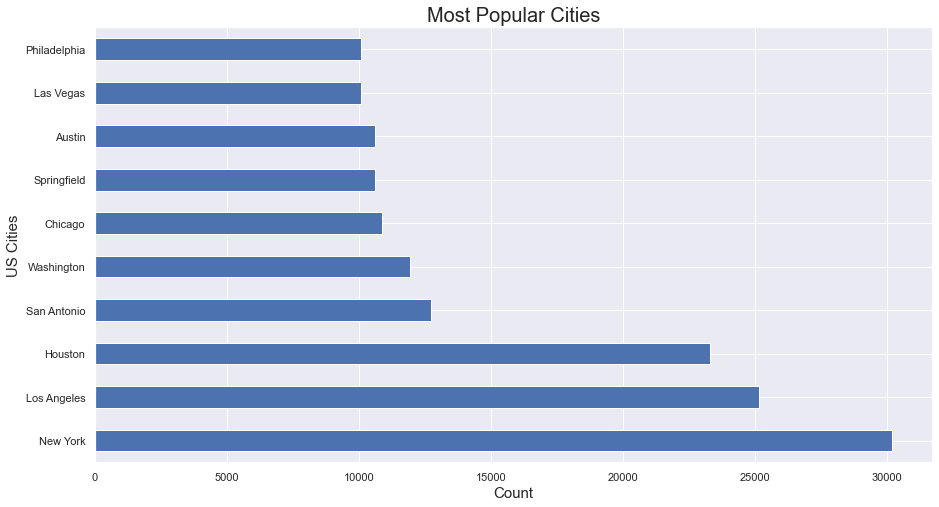

In [32]:
plt.figure(figsize=(15,8))
data.City.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("US Cities",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

New York is the most popular city followed by Los Angeles.

### 5.2 **Bivariate Analysis**
### **Average Profit Margin per State**

In [40]:
# calculate the average profit margin for each city
df_avg_value = data.groupby('State').mean().reset_index()

# sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('Price', ascending=False)

# select the top 20 cities by average profit margin
top_states = df_sorted_states['State'].head(20)

# filter the DataFrame to include only the top 20 cities
df_top_states = data[data['State'].isin(top_states)].groupby("State").mean().sort_values("Price",ascending=False)

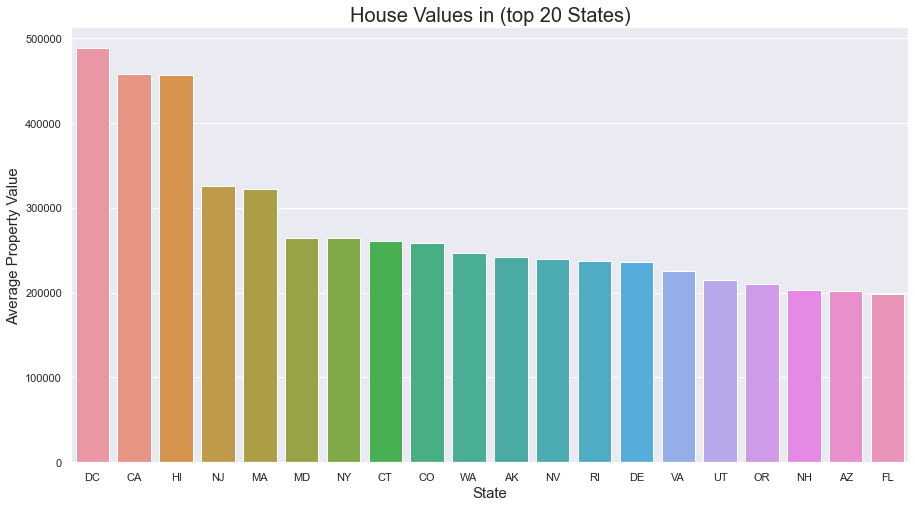

In [46]:
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=df_top_states.index, y=df_top_states.Price,ax=ax)

# set the title and axis labels
ax.set_title('House Values in (top 20 States)',fontsize=20)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Average Property Value',fontsize=15)

# display the plot
plt.show();

It can be observed that Carlifornia, Washington DC and New Jersey have the most average property value

### Mean %ROI by Zipcode

In [47]:
# grouping data by mean %ROI and selecting top 30 zipcodes
grouped1 = data.groupby('Zipcode')
state_values1 = grouped1['%ROI'].mean()
state_values_df1 = state_values1.reset_index(name='% ROI')
state_values_df1 = state_values_df1.sort_values(by='% ROI', ascending=False)
top_thirty_zipcodes_df_roi = state_values_df1.head(30)

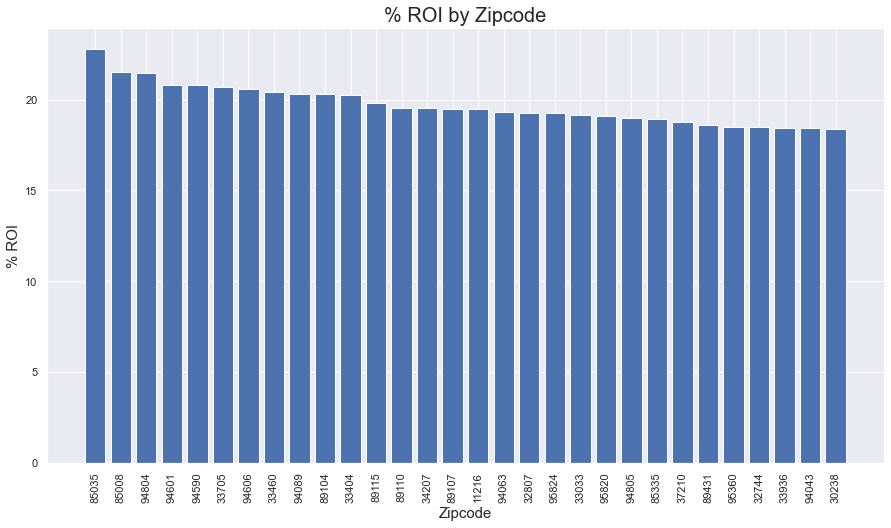

In [49]:
# plotting the %ROI by zipcode
plt.figure(figsize=(15,8))
plt.bar(top_thirty_zipcodes_df_roi['Zipcode'], top_thirty_zipcodes_df_roi['% ROI'])
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('% ROI',fontsize=15)
plt.title('% ROI by Zipcode',fontsize=20)
plt.xticks(rotation=90)
plt.show()

From this graph, zipcode 85035 seems to be the most profitable zipcode at 22.8% ROI from 2012 to 2018.

### Mean House Price

In [50]:
# creating a data series to check the prices of houses over time
ts = data.copy()
ts.set_index("Date",inplace=True)
ts = ts["Price"]

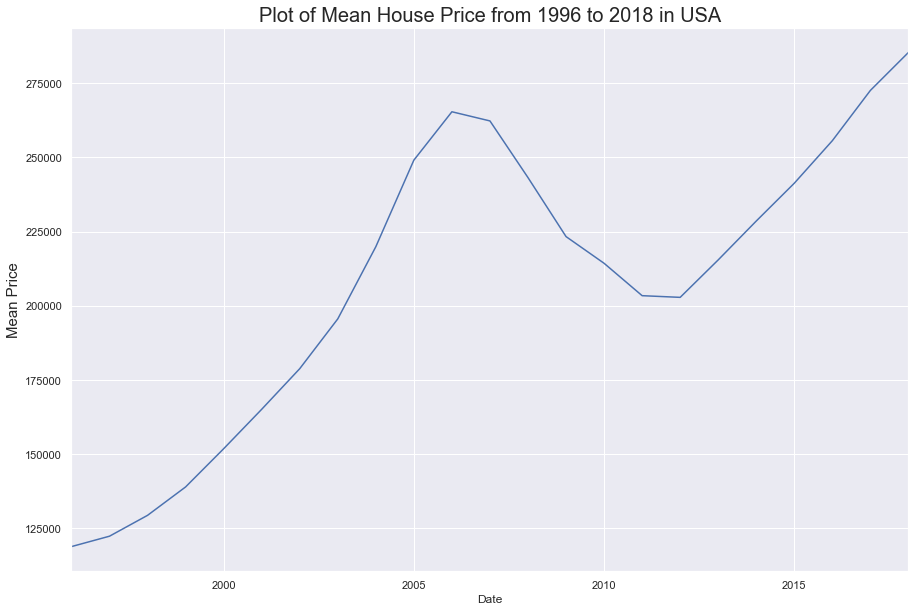

In [51]:
# plotting mean house price
plt.figure(figsize=(15,10))
ts.resample("A").mean().plot()
plt.ylabel("Mean Price",fontsize=15)
plt.title("Plot of Mean House Price from 1996 to 2018 in USA",fontsize=20);

This shows that the house price had been trending upwards from 1996-2008 until the house market crash where the house prices drastically went down and stabilised around 2012. After this the house price has been trending upwards once again till 2018.

### Time Series of Top 5 Zipcodes by %ROI

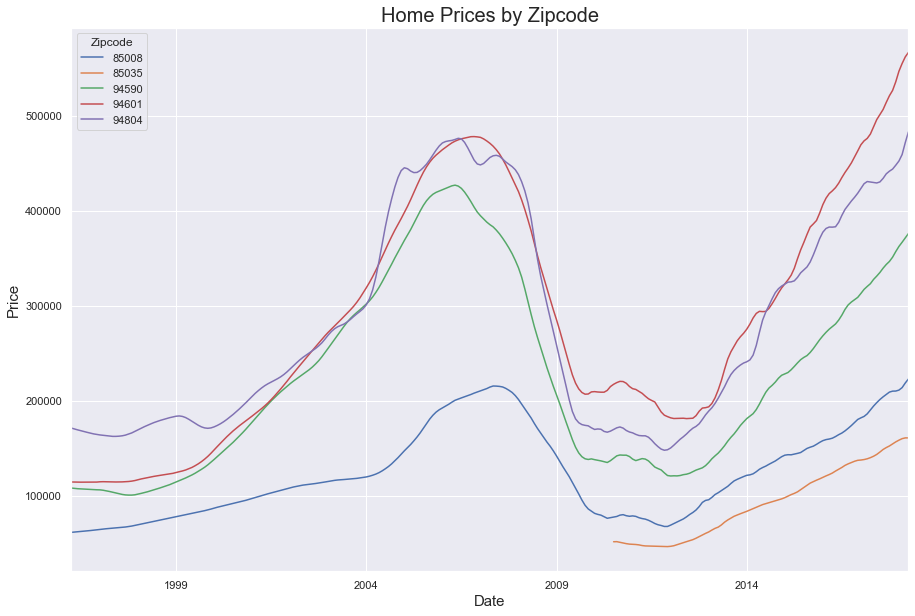

In [52]:
# Filter data for the top 5 zipcodes based on %ROI
zipcodes = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcodes)]

# Group data by date and zipcode, and calculate the mean price for each group
grouped = top_5.groupby(['Date', 'Zipcode']).mean().reset_index()

# Pivot the data to get the zipcodes as columns and the dates as rows
pivoted = grouped.pivot(index='Date', columns='Zipcode', values='Price')

# Plot the data as a line graph
pivoted.plot(kind='line', figsize=(15,10))
plt.title('Home Prices by Zipcode',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

As observed, the percentage of return on investents for the top five zipcodes had a crash in 2008 to 2012 and then from there they all have an upward linear trend.

### Mean House Price by State

In [53]:
# grouping data by mean price and selecting top 30 states
grouped = data.groupby('State')
state_values = grouped['Price'].mean()
state_values_df = state_values.reset_index(name='mean_value')
state_values_df = state_values_df.sort_values(by='mean_value', ascending=False)
top_thirty_states_df = state_values_df.head(30)
top_thirty_states_df[:5]

,State,mean_value
7,DC,487971.048218
4,CA,457429.433338
11,HI,456644.653920
31,NJ,325240.623919
19,MA,322503.757992


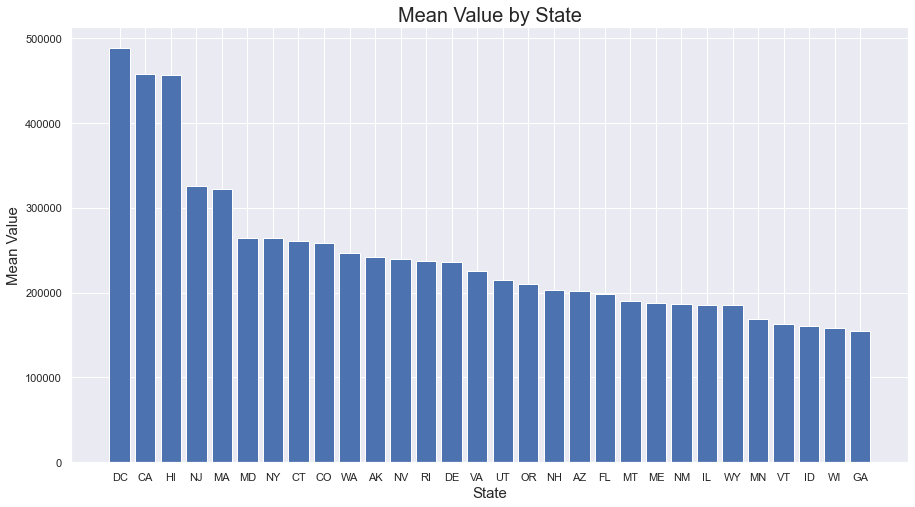

In [54]:
# plotting the mean price by state
plt.figure(figsize=(15,8))
plt.bar(top_thirty_states_df['State'], top_thirty_states_df['mean_value'])
plt.xlabel('State',fontsize=15)
plt.ylabel('Mean Value',fontsize=15)
plt.title('Mean Value by State',fontsize=20)
plt.show()

From the above graph, New Jersey has the highest mean value by State

# Mean %ROI by State

In [55]:
# grouping data by mean %ROI and selecting top 30 states
state_values1 = grouped['%ROI'].mean()
state_values_df1 = state_values1.reset_index(name='mean_value')
state_values_df1 = state_values_df1.sort_values(by='mean_value', ascending=False)
top_thirty_states_df_roi = state_values_df1.head(30)
top_thirty_states_df_roi[:5]

,State,mean_value
33,NV,12.567408
4,CA,10.634532
9,FL,9.703688
5,CO,9.050438
3,AZ,8.994475


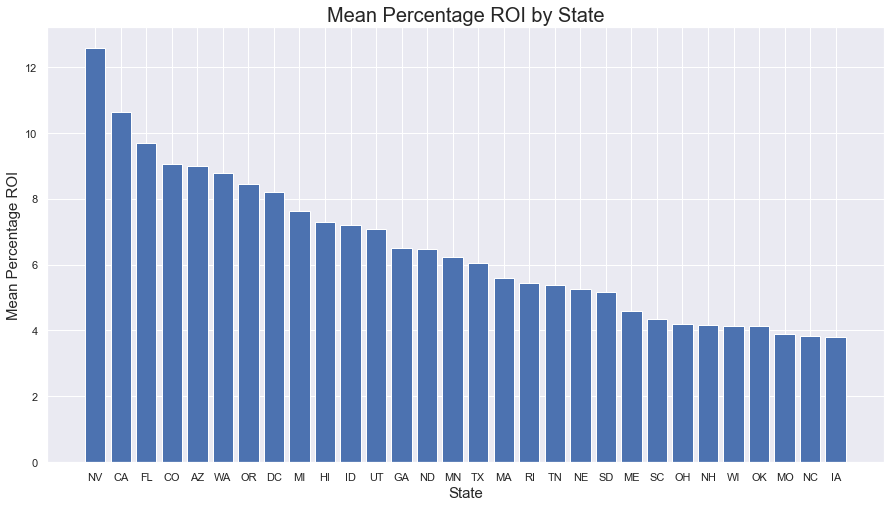

In [56]:
# plotting the mean %ROI by state
plt.figure(figsize=(15,8))
plt.bar(top_thirty_states_df_roi['State'], top_thirty_states_df_roi['mean_value'])
plt.xlabel('State',fontsize=15)
plt.ylabel('Mean Percentage ROI',fontsize=15)
plt.title('Mean Percentage ROI by State',fontsize=20)
plt.show()

Nevada has the highest mean percentage return on investment

## **6. Data Preprocessing**

When dealing with time series models, an assumption that the data is stationary is made, that is, that for each lag, the mean, variance and autocorrelation of the data do not vary across time.

Stationary Time Series makes the process of model development efficient. Before modelling, the data will be verified to be stationary by performing the Dickey Fuller test and also using the Rolling mean.

In the event the data is not stationary, differencing will be done to ensure it is stationary.

In [58]:
# Filter data for the top 5 zipcodes based on %ROI
zipcode = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcode)]

# Group data by date and zipcode, and calculate the mean price for each group and selecting from 2012
grouped_5 = top_5.groupby(['Date', 'Zipcode']).mean().reset_index()
final_df = grouped_5[grouped_5.Date >= "2005-01-01"]

final_df.head()

,Date,Zipcode,RegionID,SizeRank,%ROI,ROI price,Price
525,2005-01-01,85008,94724.0,475.0,21.534560,153799.0,147400.0
526,2005-01-01,85035,94751.0,1947.0,22.821813,114099.0,NaN
527,2005-01-01,94590,97795.0,1240.0,20.822042,255199.0,368800.0
528,2005-01-01,94601,97803.0,1478.0,20.829750,384599.0,398200.0
529,2005-01-01,94804,97850.0,1854.0,21.468835,332699.0,445300.0


Creating a dataframe to check the change over price in time for the top five zipcodes

In [59]:
TS_zc5 = final_df.drop(['RegionID', 'SizeRank', '%ROI', 'ROI price'],axis=1)

TS_zc5 = TS_zc5.set_index('Date')
print('Time series data for the 5 zipcodes:\n',TS_zc5.head())

#Create individualized time series for each zipcode.
#List containing the 5 different time series.
df_ts = []
for zipcode in TS_zc5.Zipcode.unique():
    # Create separate dataframes for each zipcode with a monthly frequency.
    df_zip = TS_zc5[TS_zc5['Zipcode']==zipcode].asfreq('MS')
    df_ts.append(df_zip)
print('\nZipcode 48894 time series:')
df_ts[0].head()

Time series data for the 5 zipcodes:
            Zipcode     Price
Date                        
2005-01-01   85008  147400.0
2005-01-01   85035       NaN
2005-01-01   94590  368800.0
2005-01-01   94601  398200.0
2005-01-01   94804  445300.0

Zipcode 48894 time series:


,Zipcode,Price
Date,,
2005-01-01,85008,147400.0
2005-02-01,85008,150700.0
2005-03-01,85008,154100.0
2005-04-01,85008,157900.0
2005-05-01,85008,161900.0


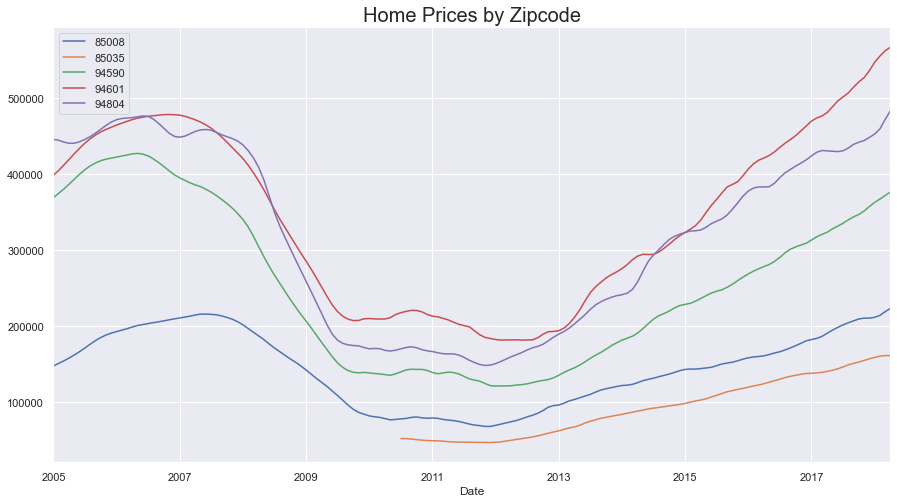

In [60]:
# plotting home prices by zipcodes
for i in range(5):
    df_ts[i].Price.plot(label=df_ts[i].Zipcode[0],figsize=(15,8))
    plt.legend()
plt.title("Home Prices by Zipcode",fontsize=20); 

It can be observed like before that there was a dip in the prices due to the 2008 market crash and then the prices continued to rise over time from 2012 all the way to 2018.

A new column called ret is created to check the returns per month

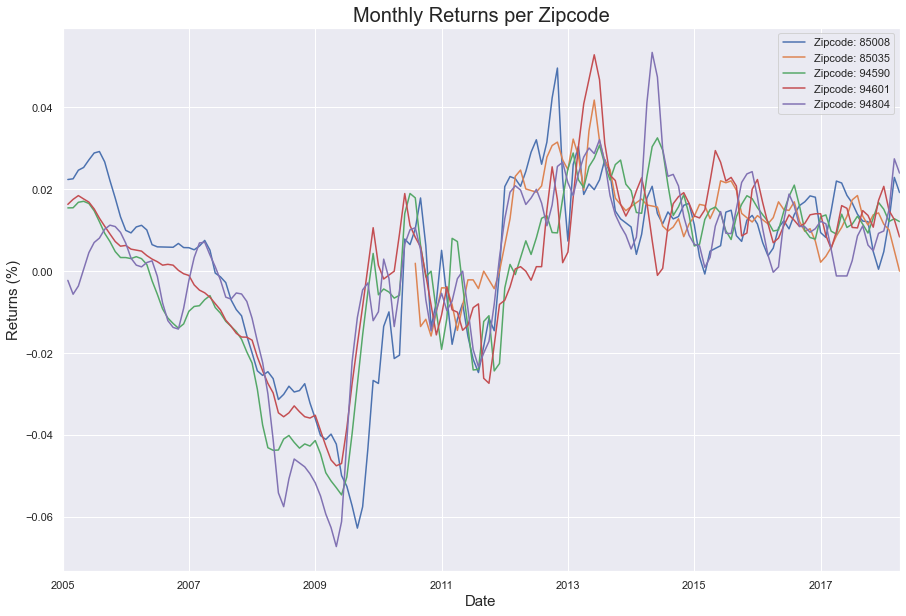

In [61]:
# creating a column called "ret" representing monthly returns on investment
for zc in range(len(df_ts)):
    df_ts[zc]['ret']=np.nan*len(df_ts[zc])
    for i in range(len(df_ts[zc])-1):
        df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1
        
#Plot the monthly returns of each zipcode
for i in range(len(df_ts)):
    df_ts[i].ret.plot(figsize=(15,10),label=f"Zipcode: {df_ts[i].Zipcode[0]}")
    plt.title(f'Monthly Returns per Zipcode',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Returns (%)',fontsize=15)
    plt.legend(loc='best')

It can be observed that there is no clear trend which could indicate stationarity. Further tests are then carried out to determine this.

# Rolling Mean to check for stationarity

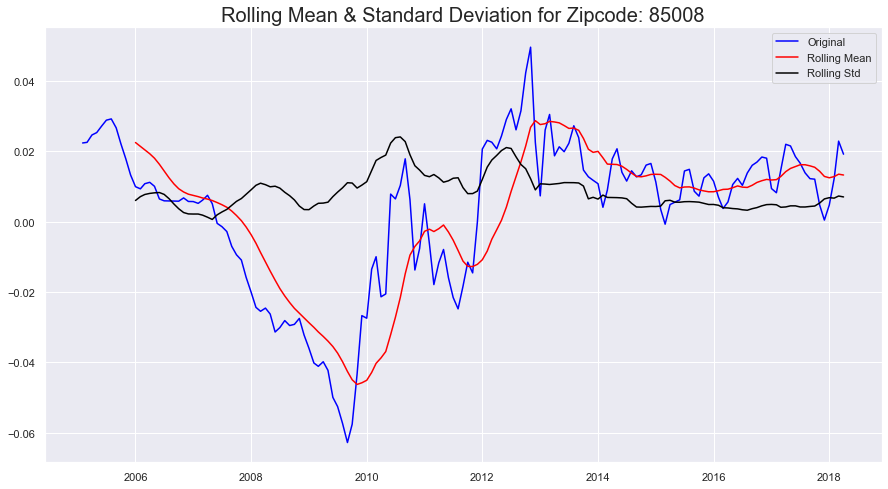

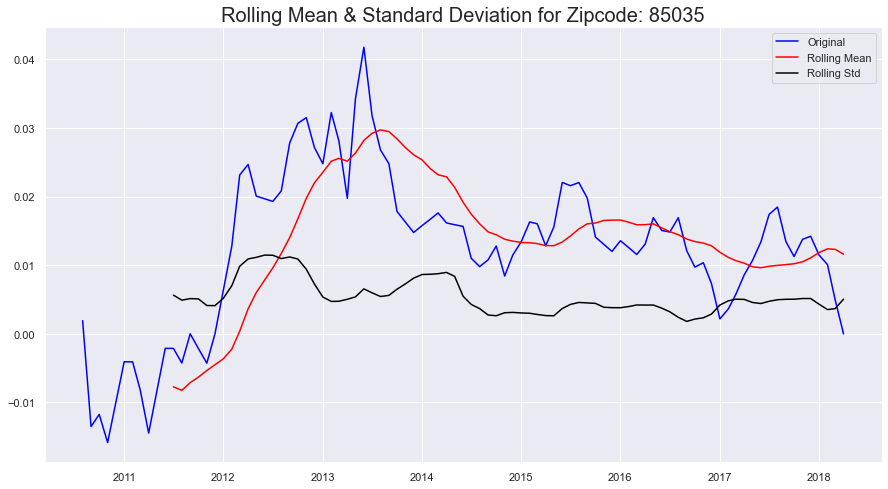

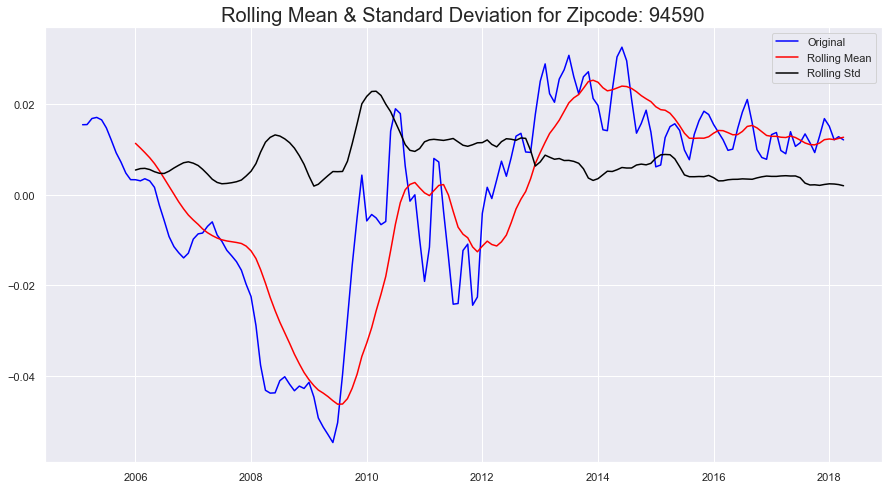

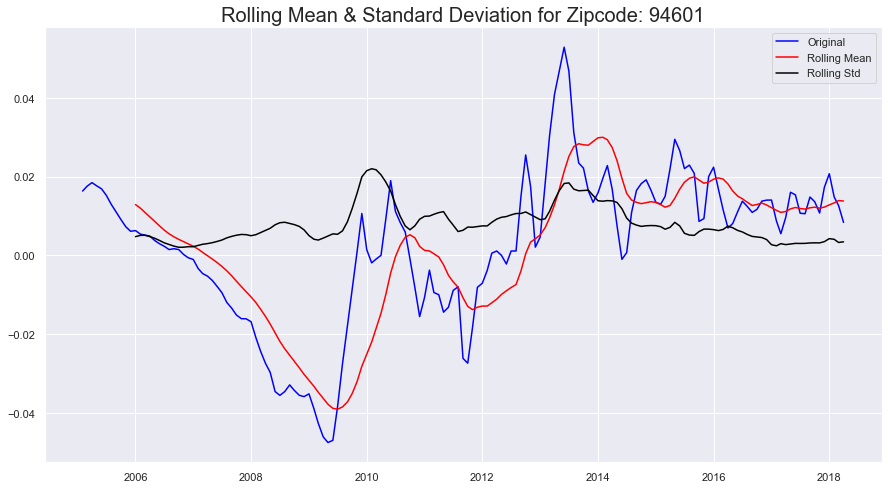

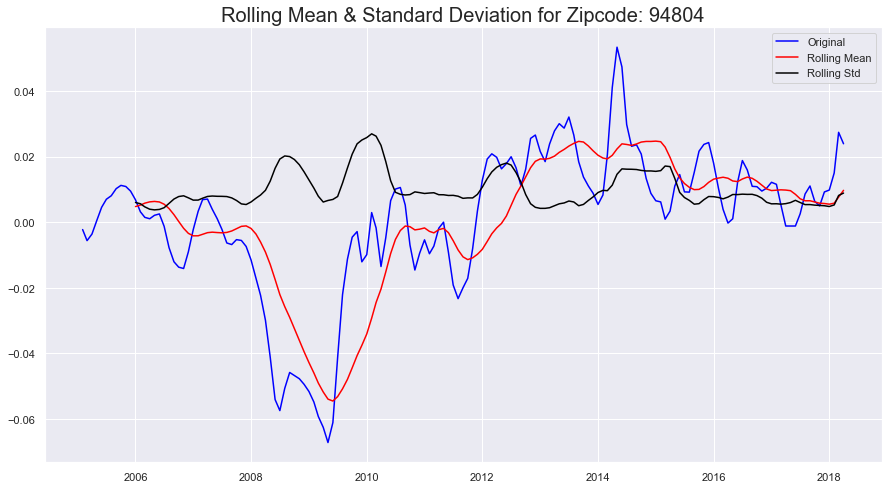

In [63]:
#Plot each of the zipcodes’ returns with their respective rolling mean and rolling standard deviation.
#Visually test for stationarity.
for i in range(len(df_ts)):
    rollingmean = df_ts[i].ret.rolling(window = 12, center = False).mean()
    rollingstd = df_ts[i].ret.rolling(window = 12, center = False).std()
    fig = plt.figure(figsize=(15,8))
    original = plt.plot(df_ts[i].ret, color="blue",label="Original")
    mean = plt.plot(rollingmean, color="red", label="Rolling Mean")
    std = plt.plot(rollingstd, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}',fontsize=20)
    plt.show()

From the graphs above there are some states that exhibit non-stationarity but to be certain, a Dickey Fuller test is performed.

In [64]:
# performing Dicky-fuller test for stationarity
for i in range(5):
    results = adfuller(df_ts[i].ret.dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 85008
p-value: 0.6295372473847525
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 85035
p-value: 0.019133149184259568
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94590
p-value: 0.37317399156272174
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94601
p-value: 0.29716340879911085
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94804
p-value: 0.3673654794585911
Fail to reject the null hypothesis. Data is not stationary.



In [65]:
# differencing the non stationary zip codes
for i in [0,2,3,4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(df_ts[i].ret.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 85008
p-value: 0.00014841526602509973
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94590
p-value: 0.013185460591181877
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94601
p-value: 0.010223197023990062
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94804
p-value: 1.9697301465546223e-07
Reject the null hypothesis. Data is stationary.



The data is now fully stationary! Modelling can now be done.

## **7. Model Development**

Since the aim is to identify the top five zipcodes to invest in, there will be five different models for each of the top five zipcodes to forecast their prices and thus give the investors and informed decision.

In [66]:
# creating individual time series 
ts_85035 = df_ts[1].ret.dropna()
ts_85008 = df_ts[0].ret.diff().dropna()
ts_94590 = df_ts[2].ret.diff().dropna()
ts_94601 = df_ts[3].ret.diff().dropna()
ts_94804 = df_ts[4].ret.diff().dropna()

In [70]:
# defining a function that plots acf and pacf plots
def acf_pacf(df,alags=40,plags=40):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

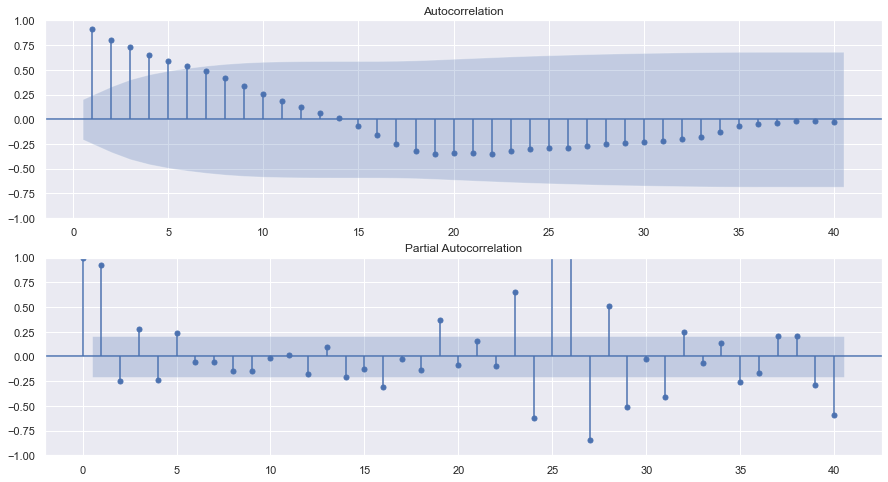

In [71]:
# plotting acf and pacf for zipcode 85035
acf_pacf(ts_85035)

In [72]:
# using auto arima to find the best p,d,q for our model
model = pm.auto_arima(ts_85035, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-743.807, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-564.435, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-739.754, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-666.336, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-494.111, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-745.915, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-712.127, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-746.637, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-747.904, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-741.329, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-746.897, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-744.455, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-735.084, Time=0.13 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] i

In [73]:
#splitting the data into train and test
train_85035 = ts_85035[:'2015-01']
test_85035 = ts_85035['2015-02':]

Fitting an ARIMA Model on the training series. The parameters to be used will be gotten from the AUTO ARIMA model above.

In [86]:
# initializing ARIMA model
ARIMAmodel = ARIMA(train_85035, order=(2, 0, 1))

In [87]:
# fit the model
ARIMAmodel = ARIMAmodel.fit()

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                   54
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 210.348
Date:                Thu, 16 Mar 2023   AIC                           -410.696
Time:                        18:39:32   BIC                           -400.751
Sample:                    08-01-2010   HQIC                          -406.860
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0115      0.008      1.456      0.145      -0.004       0.027
ar.L1          0.4476      0.245      1.827      0.068      -0.033       0.928
ar.L2          0.4027      0.242      1.661      0.0

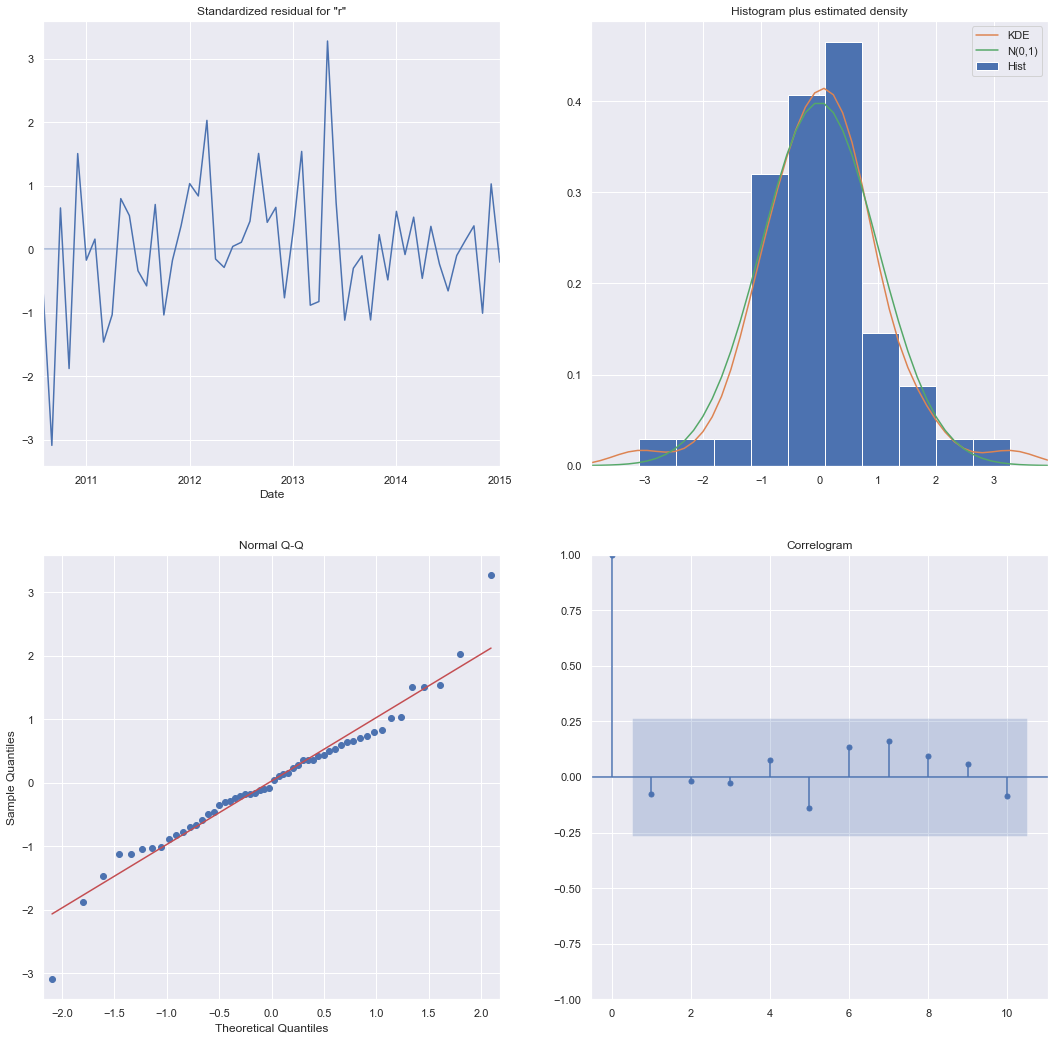

In [88]:
print(ARIMAmodel.summary())
ARIMAmodel.plot_diagnostics(figsize=(18,18))
plt.show()

The residuals should not be correlated and they should have a normal distribution to satisfy the normality assumptions.

1. The qq- plot on the bottom left shows that the residuals follow a linear trend line hence they are normally distributed.

2. The correlogram plot on the bottom left show there are low correlations with their lagged version. This tells us that there isn't any obvious seasonality in our series.

3. The histogram has a bell curve showing that the residuals are normally distributed which is a good thing.



# Testing the model's performance

In [89]:
pred = ARIMAmodel.get_prediction(start=pd.to_datetime('2015-02'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf

,lower ret,upper ret
2015-02-01,0.002119,0.020933
2015-03-01,-0.003075,0.027641
2015-04-01,-0.006060,0.029769
2015-05-01,-0.008088,0.032023
2015-06-01,-0.009655,0.033347
2015-07-01,-0.010806,0.034480
2015-08-01,-0.011719,0.035287
2015-09-01,-0.012423,0.035936
2015-10-01,-0.012984,0.036430
2015-11-01,-0.013427,0.036821


Plotting the training data against the test data

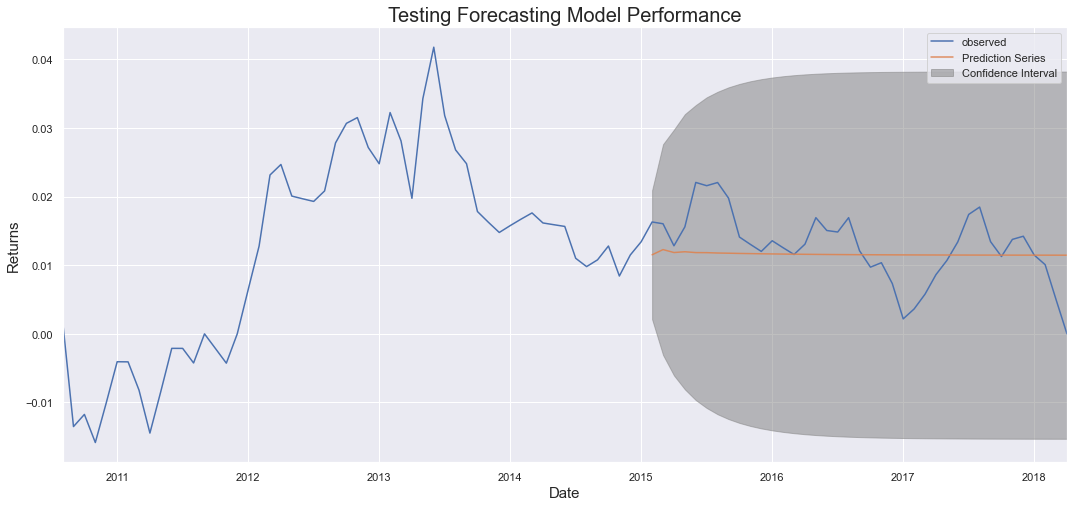

In [90]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = ts_85035.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='gray', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Returns',fontsize=15)
ax.set_title('Testing Forecasting Model Performance',fontsize=20)
plt.legend()

plt.show()

# Model Evaluation

In [91]:
MSE(test_85035,pred.predicted_mean,squared=False)

0.00508602223386915

This tells us that our the monthly returns would be off by 0.005% if this model is used. Which is a good thing since it is not off by much.

#### **Forecasting for the next 3 years**

In [95]:
# Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
ARIMA_MODEL = ARIMA(ts_85035, 
                    order=(2,0,1), 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                   93
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 381.560
Date:                Thu, 16 Mar 2023   AIC                           -753.119
Time:                        18:41:20   BIC                           -740.565
Sample:                    08-01-2010   HQIC                          -748.054
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0134      0.005      2.639      0.008       0.003       0.023
ar.L1          0.6553      0.124      5.298      0.000       0.413       0.898
ar.L2          0.2012      0.129      1.559      0.1

In [96]:
## Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction

,lower,upper,prediction
2018-05-01,-0.006565,0.007686,0.000561
2018-06-01,-0.009771,0.014365,0.002297
2018-07-01,-0.010830,0.017926,0.003548
2018-08-01,-0.011310,0.020744,0.004717
2018-09-01,-0.011454,0.022923,0.005734
2018-10-01,-0.011409,0.024682,0.006636
2018-11-01,-0.011254,0.026118,0.007432
2018-12-01,-0.011036,0.027305,0.008135
2019-01-01,-0.010785,0.028295,0.008755
2019-02-01,-0.010521,0.029127,0.009303


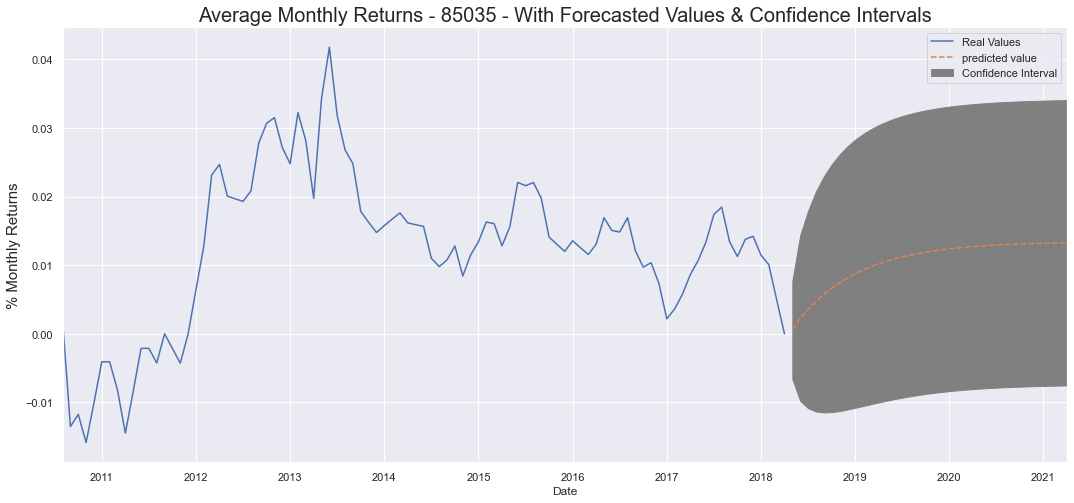

In [97]:
#Plotting our Forecast

fig, ax = plt.subplots()
ts_85035.plot(ax=ax,label='Real Values')


future_prediction['prediction'].plot(ax=ax,label='predicted value',ls='--')

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'], 
                y2= future_prediction['upper'],color='gray',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("% Monthly Returns",fontsize=15)
plt.title('Average Monthly Returns - 85035 - With Forecasted Values & Confidence Intervals',fontsize=20)
plt.show()

### **Forecasting for every zipcode**

In [99]:
zip_predictions = {}

#Zillow is a list of zipcodes in Miami-Dade County with average price under $300000
for i in range(len(df_ts)):

    #Melting the time series of our given zipcode
    series = df_ts[i]["Price"]
    
    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]
    
    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]
    
    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series, 
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)
   
    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = SARIMAX(recent_series, 
                          order= auto_model.order, 
                          seasonal_order= auto_model.seasonal_order, 
                          enforce_stationarity=False, 
                          enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['Price'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction'] 
    
    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1128.187, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1127.998, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1128.514, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1129.499, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1088.950, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1086.951, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1088.950, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1079.476, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1074.058, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1090.009, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1190.643, T

# **8. Conclusion and Recommendations**

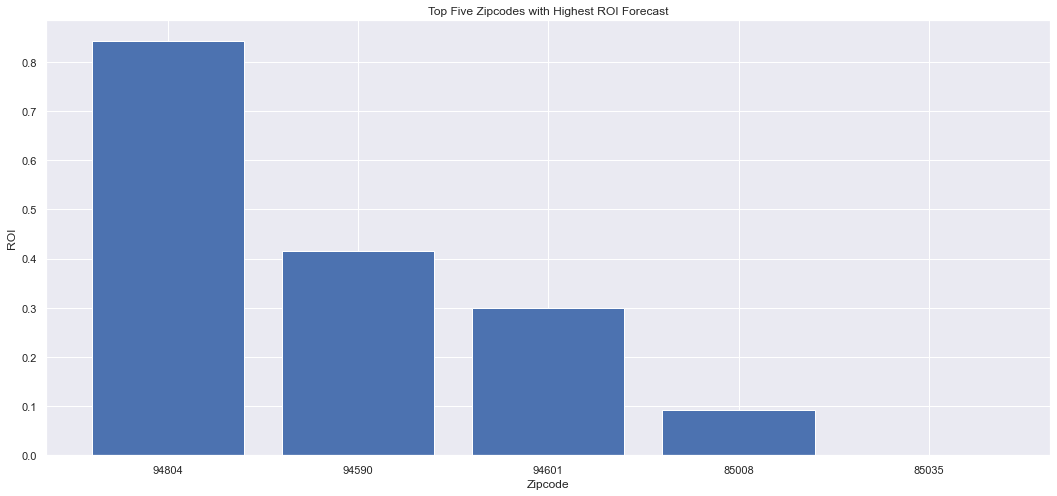

In [100]:
# Get the top five zipcodes with the highest ROI
top_zipcodes = sorted(zip_predictions, key=zip_predictions.get, reverse=True)[:5]

# Create a list of ROI values for the top five zipcodes
roi_values = [zip_predictions[zipcode] for zipcode in top_zipcodes]

# Create a bar graph of the top five zipcodes and their corresponding ROI values
plt.bar(top_zipcodes, roi_values)
plt.xlabel('Zipcode')
plt.ylabel('ROI')
plt.title('Top Five Zipcodes with Highest ROI Forecast')
plt.show()

If you can get it to display the zipcodes that will be lovely

# **Not sure what has happened here???**

In [102]:
print(f'The Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[:1][0][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[:1][0][1])*100,2)}%')


NameError: name 'sorted_forecast_3yr' is not defined

All the Zipcodes have an encouraging predicted price seeing as they are in the positive.

Based on the above graph, we can conclude our top five recommendations and their expected ROI after three years.

The investor can then decide to invest in any of the above zipcodes.

# **9. Follow up questions**

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data?
Yes the data was correct and verified

b). Do we need other data to answer our question?
Yes, it would be effective if we had other additional information apart from the price only to determine whether other social/economic factors would determine whether one would invest in a certain area or not.
Facilities like schools, hospitals, level of security can affect whether one would invest in a given area or not.

c). Did we have the right question?
The question chosen was correct 